<h1 align=center><font size = 8>Non Linear Regression Analysis</font></h1>

If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression since linear regression presumes that the data is linear.
In this notebook, I will fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.


<h2 id="importing_libraries">Importing required libraries</h2>


In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Although linear regression can do a great job at modeling some datasets, it cannot be used for all datasets. 

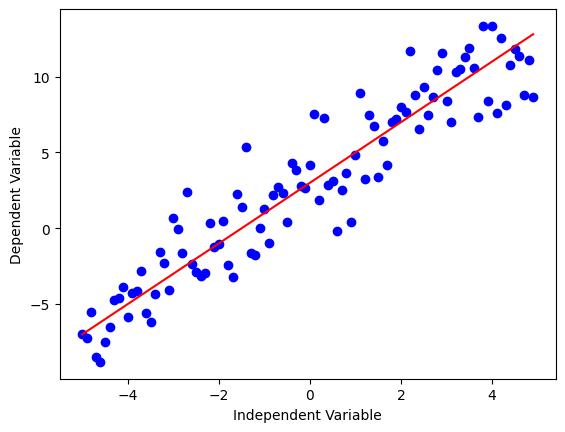

In [43]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Take a look at a cubic function's graph.


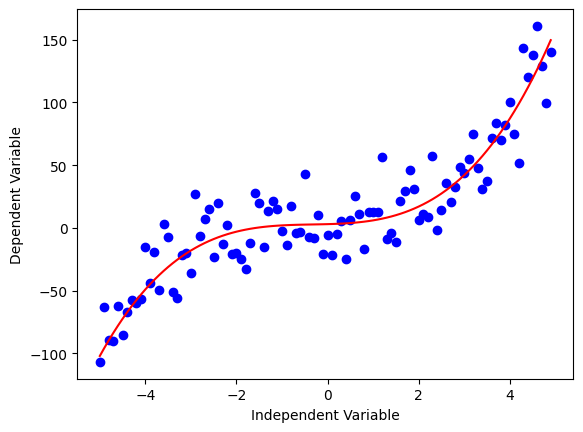

In [44]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

As you can see, this function has $x^3$ and $x^2$ as independent variables. Also, the graphic of this function is not a straight line over the 2D plane. So this is a non-linear function.


Some other types of non-linear functions are:


### Quadratic


$$ Y = X^2 $$


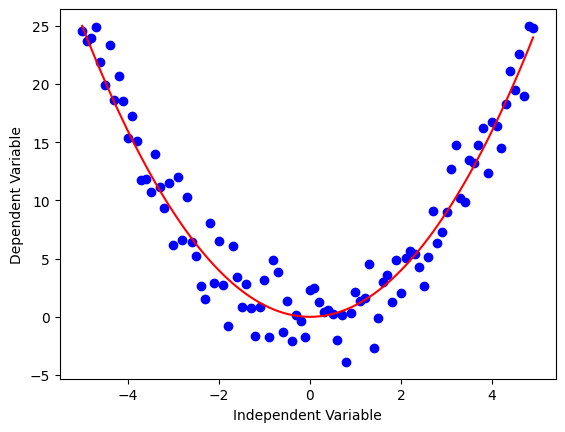

In [45]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Exponential


An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.


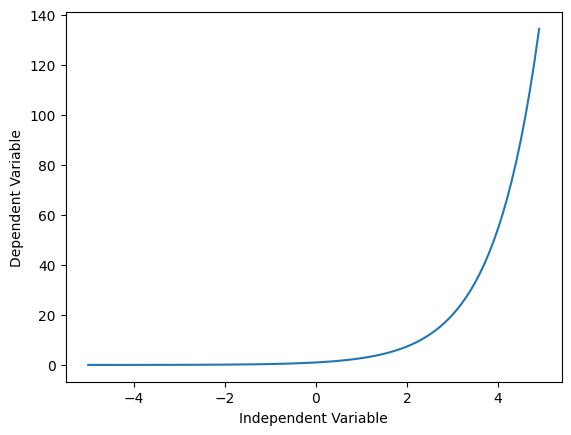

In [46]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Logarithmic

The response $y$ is a results of applying the logarithmic map from the input $x$ to the output $y$. It is one of the simplest form of **log()**: i.e. $$ y = \log(x)$$

Instead of $x$, we can use $X$, which can be a polynomial representation of the $x$ values. In general form it would be written as\
\begin{equation}
y = \log(X)
\end{equation}


C:\Users\tina\AppData\Local\Temp\ipykernel_5660\2233958358.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


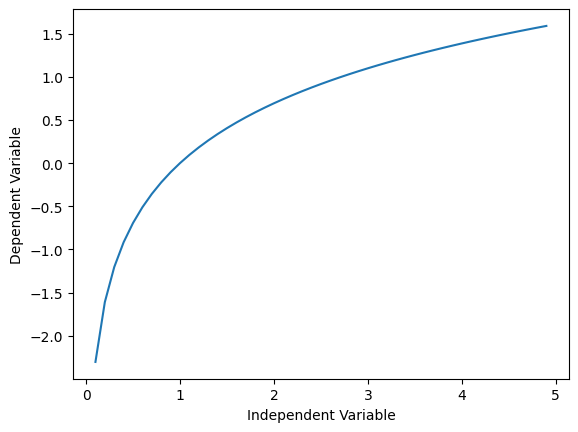

In [47]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Sigmoidal/Logistic


$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


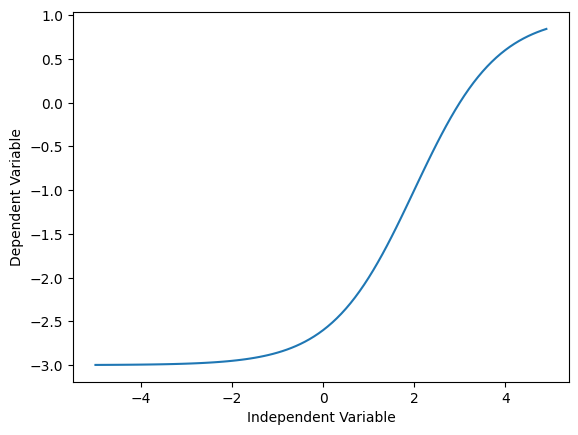

In [48]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

<a id="ref2"></a>

# Non-Linear Regression example


For an example, I'm going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. I download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.


In [49]:
import numpy as np
import pandas as pd

#downloading dataset
!wget https://raw.githubusercontent.com/tina-ds/Machine-Learning-with-Python/main/china_gdp.csv
    
df = pd.read_csv('china_gdp.csv')
df.head(10)

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotting the Dataset

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates slightly in the 2010s.


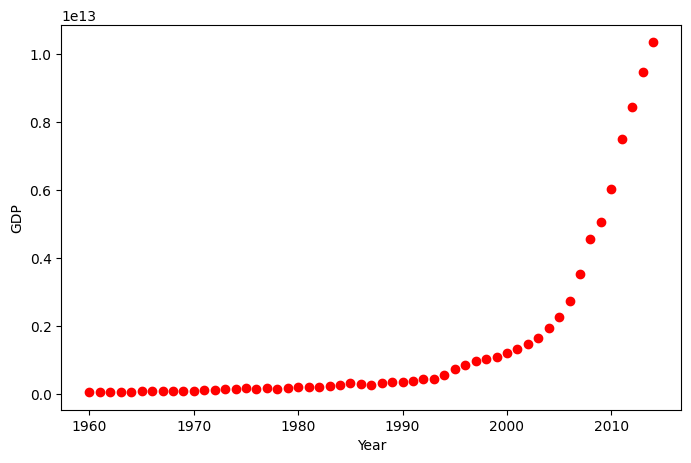

In [50]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a model

From an initial look at the plot, I determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


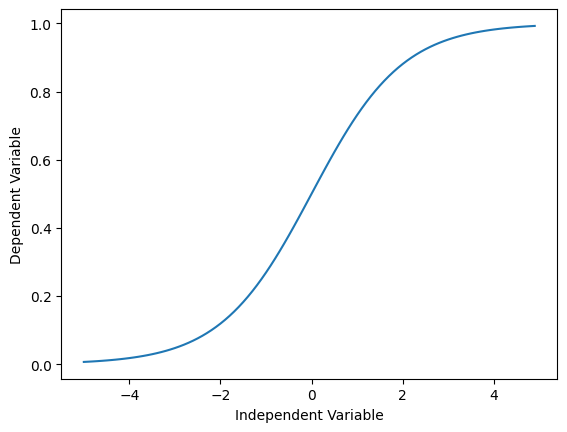

In [51]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Building The Model

Now, I'll build this regression model and initialize its parameters.


In [52]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Look at a sample sigmoid line that might fit with the data:


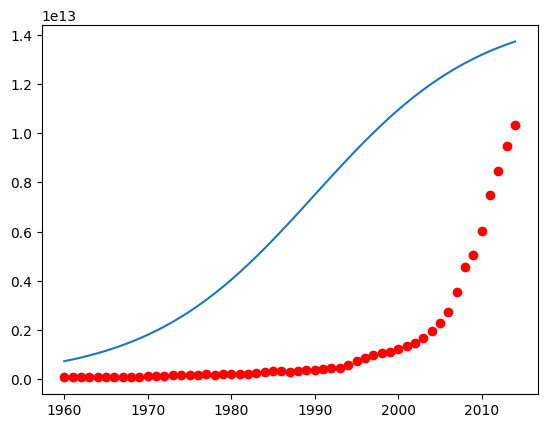

In [53]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

My task here is to find the best parameters for our model. First normalize my x and y:


In [54]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [55]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


Now I plot my resulting regression model.


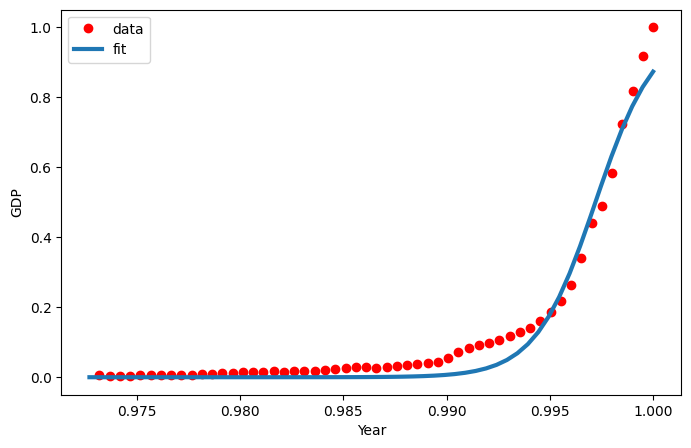

In [56]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Practice

I can calculate what is the accuracy of my model.


In [57]:
# write your code here
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [58]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [59]:
y_hat = sigmoid(test_x, *popt)

In [60]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.87
